In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt
import json
import torch
from glob import glob
import joblib
import seaborn as sns

In [2]:
files = sorted(glob('weight_training/*'), key = lambda x:(int(x.split('_')[2][1:]), int(x.split('_')[3][5:])))

In [4]:
dense_weight = []
sparse_weight = []
for file in files:
    with open(file,'rb') as f:
        weights = joblib.load(f)
        dense_weight.append(weights[0].detach().numpy())
        sparse_weight.append(weights[1].detach().numpy())

In [5]:
dense_weights = np.concatenate(dense_weight, axis = 0).reshape(-1,10)
sparse_weights = np.concatenate(sparse_weight, axis = 0).reshape(-1,10)

In [6]:
ratio = dense_weights/sparse_weights

In [61]:
x_data = ['100','500','1000','2500','5000','10000','15000','20000']
y_data = ratio.mean(axis=1)
a_y_data = dense_weights.mean(axis=1)
b_y_data = sparse_weights.mean(axis=1)
y_data_err = ratio.std(axis = 1)
a_y_data_err = dense_weights.std(axis = 1)
b_y_data_err = sparse_weights.std(axis = 1)

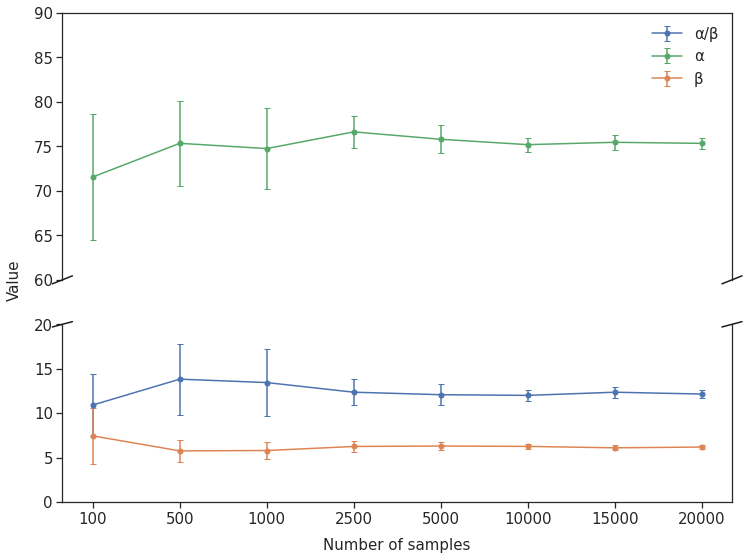

In [121]:
fig, (ax1,ax) = plt.subplots(2,1,sharex=True,gridspec_kw={'height_ratios': [3, 2]})
sns.set(rc={"figure.figsize": (12, 9)})
sns.set_style("ticks")
ratio_plt = ax.errorbar(x_data, y_data, 
            yerr = y_data_err,
            fmt = '-', marker = '.',markersize = 10, 
            capsize = 3,capthick=1, label = 'α/β'
        )
a_plot = ax1.errorbar(x_data, a_y_data, 
            yerr = a_y_data_err,
            fmt = '-', marker = '.',markersize = 10, color = 'g',
            capsize = 3,capthick=1, label = 'α'
            )
b_plot = ax.errorbar(x_data, b_y_data, 
            yerr = b_y_data_err,
            fmt = '-', marker = '.',markersize = 10, 
            capsize = 3,capthick=1, label = 'β'
            )
# plt.fill_between(x_data, y_data-y_data_err, y_data+y_data_err, 
#         facecolor = 'b', alpha = 0.3)
ax.set_ylim(0,20)
ax1.set_ylim(60,90)  # most of the data
ax1.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax1.xaxis.set_ticks_position('none') 
d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
d = .015
kwargs.update(transform=ax.transAxes)  # switch to the bottom axes
ax.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax1.tick_params(axis='y', labelsize= 15)
ax.set_xlabel('Number of samples',size = 15)
ax.set_ylabel('Value',size = 15)
ax.yaxis.set_label_coords(-0.06, 1.25)
ax.xaxis.set_label_coords(0.5, -0.2)
ax.yaxis.set_major_locator(plt.MaxNLocator(4))
ax1.yaxis.set_major_locator(plt.MaxNLocator(6))
legend = ax1.legend(
    handles = [ratio_plt,a_plot,b_plot],fontsize=15
)
frame = legend.get_frame()
frame.set_facecolor('none')
frame.set_edgecolor('none')
fig.savefig('weight_error_bar.png',dpi=300)


In [10]:
import torch

In [11]:
a = torch.tensor([
    [1,2,3],
    [2,3,4],
    [4,5,6]
])

In [12]:
a[torch.randint(3,(2,))]

tensor([[4, 5, 6],
        [1, 2, 3]])